<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Step-2.3" data-toc-modified-id="Step-2.3-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Step 2.3</a></span></li><li><span><a href="#Step-2.4" data-toc-modified-id="Step-2.4-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Step 2.4</a></span><ul class="toc-item"><li><span><a href="#Задача-про-ирисы" data-toc-modified-id="Задача-про-ирисы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Задача про ирисы</a></span></li></ul></li></ul></div>

## Step 2.3

[Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)

In [149]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.display import SVG, display, HTML

In [3]:
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 
HTML(style)

In [4]:
titanic_data = pd.read_csv("train.csv")

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
Y = titanic_data.Survived

In [8]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [9]:
X = pd.get_dummies(X)

In [10]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [11]:
X = X.fillna(X.Age.median())

In [12]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [13]:
clf.fit(X, Y)

DecisionTreeClassifier(criterion='entropy')

Рисуем дерево. (очень долго выполняется, по этому скрыто)

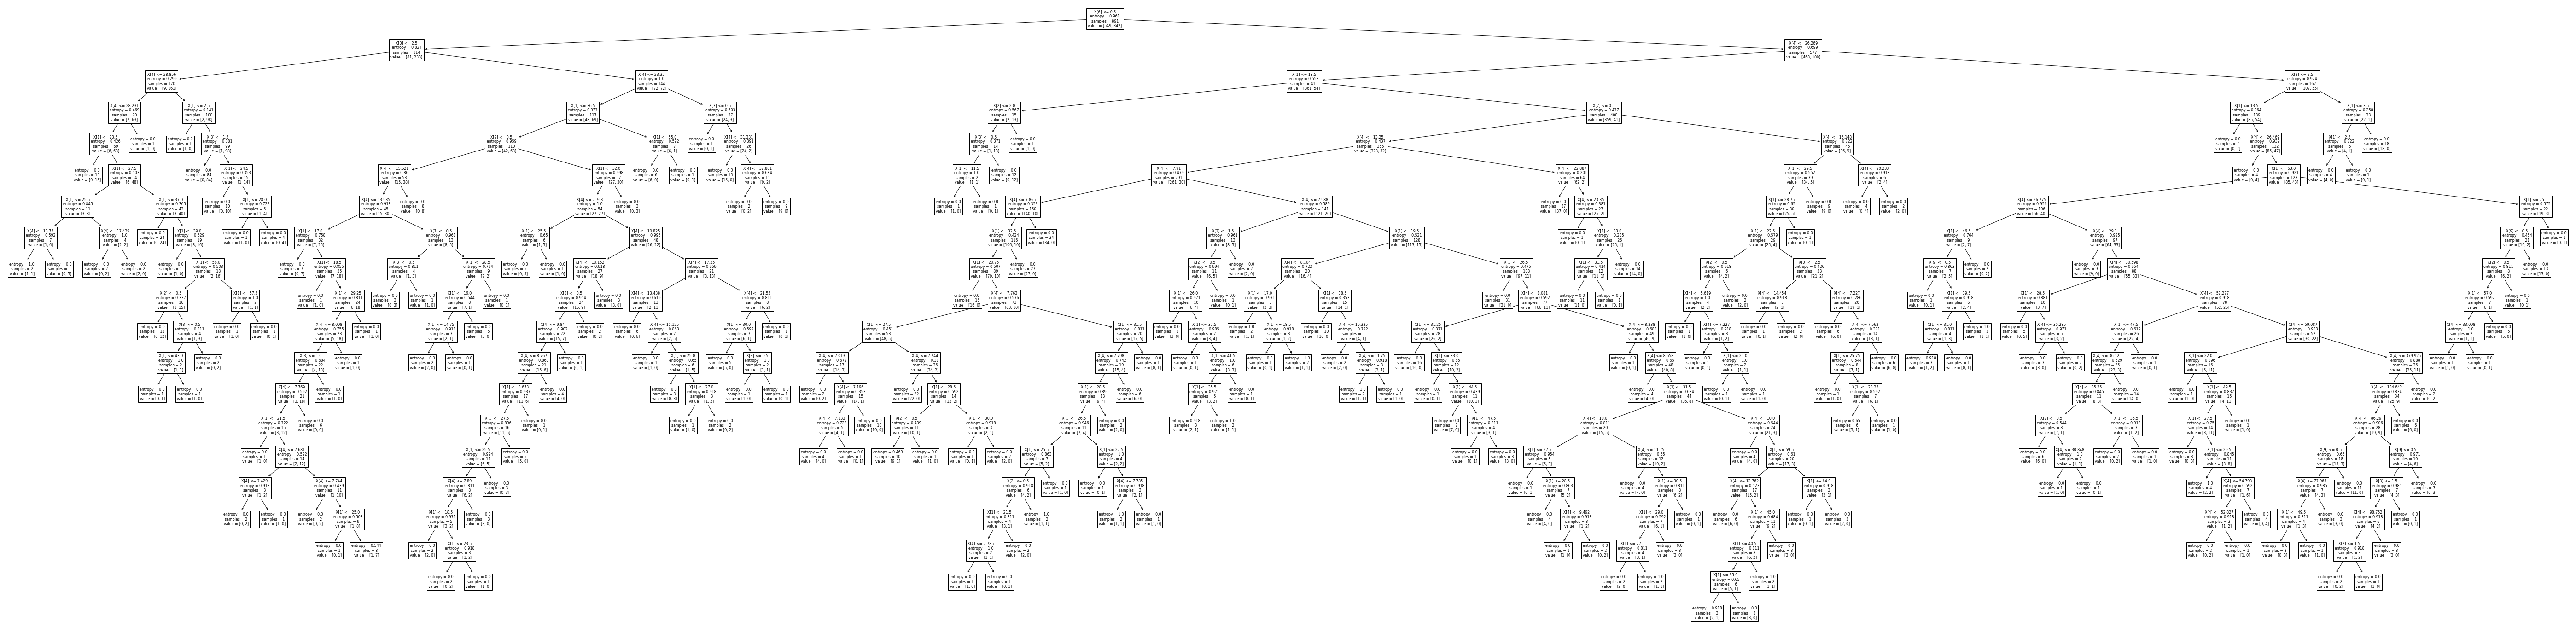

In [14]:
# plt.figure(figsize=(100, 25))
# tree.plot_tree(clf);

In [15]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [18]:
X_train.shape

(596, 10)

In [19]:
X_test.shape

(295, 10)

In [20]:
clf.score(X, Y)

0.9797979797979798

In [21]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [22]:
clf.score(X_train, Y_train)

0.9798657718120806

In [23]:
clf.score(X_test, Y_test)

0.7796610169491526

In [24]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [25]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [26]:
clf.score(X_train, Y_train)

0.8238255033557047

In [27]:
clf.score(X_test, Y_test)

0.8203389830508474

## Step 2.4

Обучение, переобучение, недообучение и [кросвалидация](https://scikit-learn.org/stable/modules/cross_validation.html)

In [86]:
from sklearn.model_selection import cross_val_score

In [34]:
max_depth_values = range(1, 100)

In [78]:
scores_data = pd.DataFrame()

In [79]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, Y_train)
    train_score = clf.score(X_train, Y_train)
    test_score = clf.score(X_test, Y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, Y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                              'train_score': [train_score],
                              'test_score': [test_score],
                              'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [80]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.795350


In [81]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                          value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')

In [82]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [83]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.795350
203,6,cross_val_score,0.802073
204,7,cross_val_score,0.795336
205,8,cross_val_score,0.805406
206,9,cross_val_score,0.791947
207,10,cross_val_score,0.798669


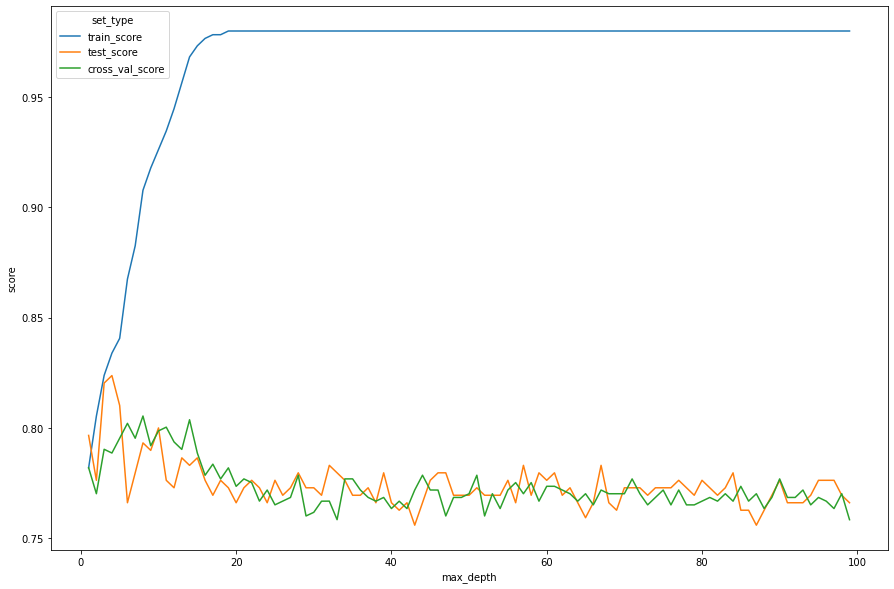

In [84]:
plt.figure(figsize=(15, 10))
sns.lineplot(x = "max_depth", y="score", hue="set_type", data=scores_data_long);

In [159]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=14)

In [160]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [161]:
cross_val_score(best_clf, X_test, Y_test, cv=5).mean()

0.7932203389830509

### Задача про ирисы

In [131]:
train_iris = pd.read_csv('train_iris.csv').drop(['Unnamed: 0'], axis=1)
test_iris = pd.read_csv('test_iris.csv').drop(['Unnamed: 0'], axis=1)

In [132]:
train_iris.head()

,sepal length,sepal width,petal length,petal width,species
0,7.4,2.8,6.1,1.9,2
1,5.0,3.4,1.5,0.2,0
2,4.8,3.4,1.6,0.2,0
3,5.8,2.7,5.1,1.9,2
4,7.2,3.6,6.1,2.5,2


In [133]:
test_iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.8,2.8,5.1,2.4,2
1,5.9,3.2,4.8,1.8,1
2,6.0,3.0,4.8,1.8,2
3,5.2,2.7,3.9,1.4,1
4,5.1,3.8,1.9,0.4,0


In [134]:
X_train_iris = train_iris.drop('species', axis=1)
X_train_iris.head()

,sepal length,sepal width,petal length,petal width
0,7.4,2.8,6.1,1.9
1,5.0,3.4,1.5,0.2
2,4.8,3.4,1.6,0.2
3,5.8,2.7,5.1,1.9
4,7.2,3.6,6.1,2.5


In [135]:
X_train_iris.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
dtype: int64

In [136]:
Y_train_iris = train_iris.species
Y_train_iris

0     2
1     0
2     0
3     2
4     2
     ..
95    2
96    2
97    2
98    2
99    1
Name: species, Length: 100, dtype: int64

In [137]:
X_test_iris = test_iris.drop('species', axis=1)
X_test_iris.head()

,sepal length,sepal width,petal length,petal width
0,5.8,2.8,5.1,2.4
1,5.9,3.2,4.8,1.8
2,6.0,3.0,4.8,1.8
3,5.2,2.7,3.9,1.4
4,5.1,3.8,1.9,0.4


In [138]:
Y_test_iris = test_iris.species
Y_test_iris

0     2
1     1
2     2
3     1
4     0
5     2
6     0
7     2
8     0
9     1
10    2
11    1
12    2
13    0
14    0
15    2
16    1
17    0
18    0
19    1
20    1
21    2
22    0
23    0
24    1
25    0
26    0
27    1
28    0
29    0
30    1
31    1
32    1
33    1
34    2
35    1
36    2
37    1
38    2
39    2
40    0
41    1
42    2
43    1
44    1
45    2
46    1
47    2
48    0
49    1
Name: species, dtype: int64

In [139]:
max_depth_values = range(1, 100)

In [140]:
scores_data_iris = pd.DataFrame()

In [150]:
rs = np.random.seed(0)

In [151]:
for max_depth in max_depth_values:    
    clf_iris = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf_iris.fit(X_train_iris, Y_train_iris)
    train_score_iris = clf_iris.score(X_train_iris, Y_train_iris)
    test_score_iris = clf_iris.score(X_test_iris, Y_test_iris)
    
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                              'train_score': [train_score_iris],
                              'test_score': [test_score_iris]})
    
    scores_data_iris = scores_data_iris.append(temp_score_data)

In [152]:
scores_data_iris.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


In [153]:
scores_data_iris_long = pd.melt(scores_data_iris, id_vars=['max_depth'],
                          value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='score')

<AxesSubplot:xlabel='max_depth', ylabel='score'>

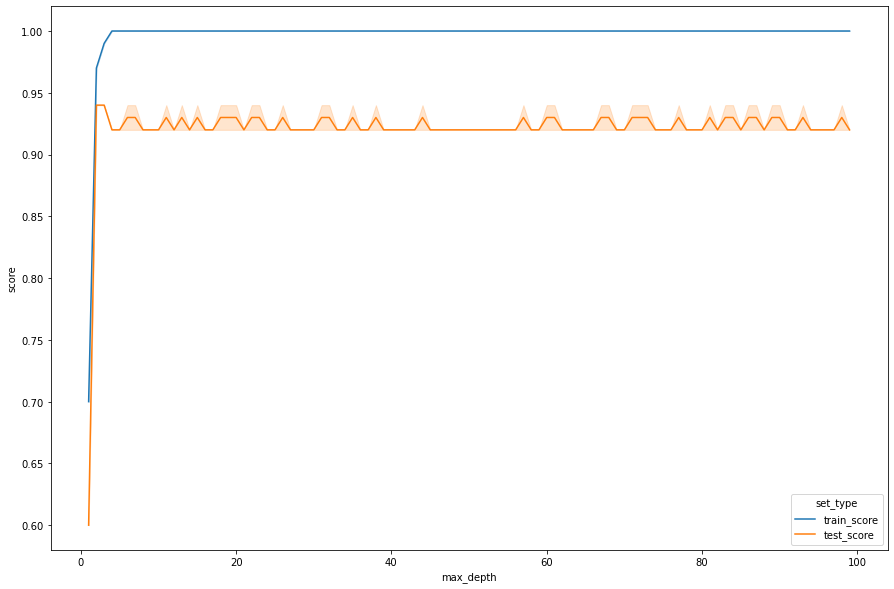

In [154]:
plt.figure(figsize=(15, 10))
sns.lineplot(x = "max_depth", y="score", hue="set_type", data=scores_data_iris_long)